In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [4]:
df_raw = pd.read_csv("/content/drive/MyDrive/Test1/application_train.csv")
df_raw.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i, j in enumerate(df_raw.columns):
  print(i,j)

## Pick necessary columns

In [151]:
df_col = np.hstack([
    [i for i in range(1,18)],
    [28]
])

df = df_raw.iloc[:,df_col]
print(f'Dataframe has {df.shape[0]} rows and {df.shape[1]} columns\n')
df.head(3)

Dataframe has 307511 rows and 18 columns



,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,OCCUPATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,Laborers
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,Core staff
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,Laborers


## Convert datetime columns and calculate the age

In [7]:
df['DAYS_BIRTH'] = pd.to_timedelta(df['DAYS_BIRTH'], unit="D") + pd.Timestamp('now')  #assume that today is the application day

In [8]:
def calculate_age(born):
    today = pd.Timestamp('now')
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['AGE'] = df['DAYS_BIRTH'].apply(lambda x: calculate_age(x))

## Data cleaning

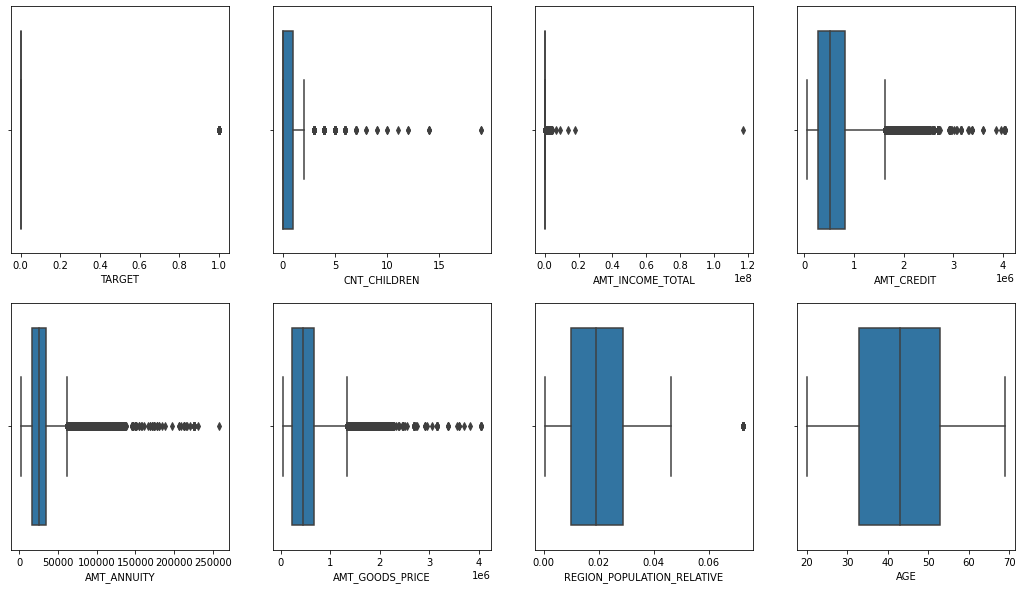

In [9]:
df_col_int = df.select_dtypes(exclude=["object","datetime"]).columns
plt.figure(figsize=(18,10))

for i,j in enumerate(df_col_int):
  plt.subplot(2,4,i+1)
  sns.boxplot(j, data=df)
plt.show()

In [10]:
df.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
OCCUPATION_TYPE               96391
AGE                               0
dtype: int64

In [11]:
df['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)
df.dropna(axis=0, inplace=True)

In [12]:
df.isnull().sum().sum()

0

In [33]:
df.reset_index(drop=True, inplace=True)
idx = df.loc[df['CODE_GENDER'] == 'XNA'].index.values
df = df.drop(index=idx, axis=0)

In [13]:
df.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,OCCUPATION_TYPE,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1996-11-03 08:10:14.081294,Laborers,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1976-11-04 08:10:14.081294,Core staff,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1970-08-07 08:10:14.081294,Laborers,52


## Exploratory Data Analysis

In [47]:
df['count'] = 1

In [35]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE
count,306203.000000,306203.000000,3.062030e+05,3.062030e+05,306203.000000,3.062030e+05,306203.000000,306203.000000
mean,0.080845,0.417021,1.687823e+05,5.988010e+05,27122.210470,5.379491e+05,0.020865,43.416237
std,0.272597,0.722113,2.375221e+05,4.019625e+05,14490.897429,3.689205e+05,0.013830,11.942617
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,34.000000
50%,0.000000,0.000000,1.476000e+05,5.135310e+05,24930.000000,4.500000e+05,0.018850,43.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.000000


In [36]:
plt.style.use('Solarize_Light2')

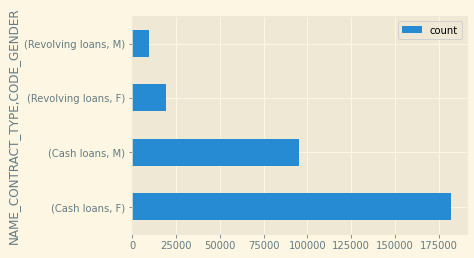

In [86]:
cont = df.groupby(['NAME_CONTRACT_TYPE','CODE_GENDER']).sum()[['count']]
cont.plot(kind="barh")
plt.show()

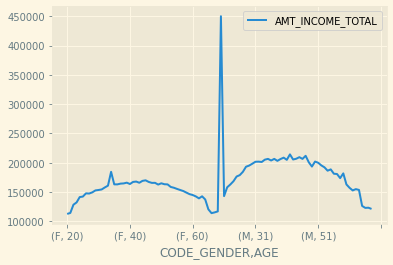

In [113]:
age = df.groupby(['CODE_GENDER','AGE']).mean()[['AMT_INCOME_TOTAL']]
age.plot()

In [69]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,OCCUPATION_TYPE,AGE,count
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1996-11-03 08:10:14.081294,Laborers,25,1
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1976-11-04 08:10:14.081294,Core staff,45,1
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1970-08-07 08:10:14.081294,Laborers,52,1
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1970-09-17 08:10:14.081294,Laborers,52,1
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1968-03-04 08:10:14.081294,Core staff,54,1


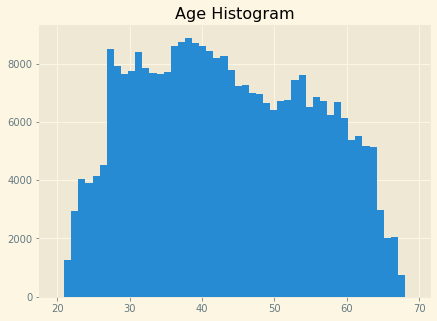

In [39]:
plt.figure(figsize=(7,5))
plt.hist(x='AGE', bins=50, data=df)
plt.title("Age Histogram")
plt.show()

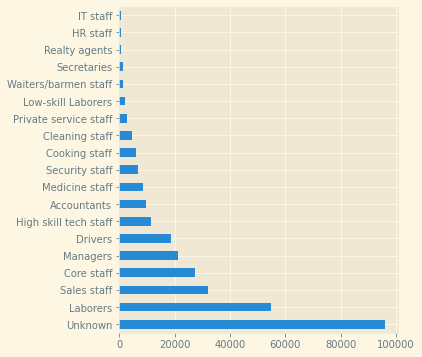

In [40]:
occ = df.OCCUPATION_TYPE.value_counts()
occ.plot(kind='barh', figsize=(5,6))
plt.show()

## Prediction

In [127]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [115]:
df.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,OCCUPATION_TYPE,AGE,count
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1996-11-03 08:10:14.081294,Laborers,25,1
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1976-11-04 08:10:14.081294,Core staff,45,1
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1970-08-07 08:10:14.081294,Laborers,52,1


In [116]:
for i,j in enumerate(df.columns):
  print(i,j)

0 TARGET
1 NAME_CONTRACT_TYPE
2 CODE_GENDER
3 FLAG_OWN_CAR
4 FLAG_OWN_REALTY
5 CNT_CHILDREN
6 AMT_INCOME_TOTAL
7 AMT_CREDIT
8 AMT_ANNUITY
9 AMT_GOODS_PRICE
10 NAME_TYPE_SUITE
11 NAME_INCOME_TYPE
12 NAME_EDUCATION_TYPE
13 NAME_FAMILY_STATUS
14 NAME_HOUSING_TYPE
15 REGION_POPULATION_RELATIVE
16 DAYS_BIRTH
17 OCCUPATION_TYPE
18 AGE
19 count


## Prepare training and testing set

In [117]:
df_col = [0,1,2,6,7,8,9,18]

df_pred = df.iloc[:,df_col]
df_pred.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE
0,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,25
1,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,45
2,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,52


In [126]:
dummy = pd.get_dummies(df_pred['CODE_GENDER'])
df_pred.drop('CODE_GENDER', axis=1, inplace=True)
df_pred = pd.concat([df_pred,dummy], axis=1)
df_pred.head(3)

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,F,M
0,1,Cash loans,202500.0,406597.5,24700.5,351000.0,25,0,1
1,0,Cash loans,270000.0,1293502.5,35698.5,1129500.0,45,1,0
2,0,Revolving loans,67500.0,135000.0,6750.0,135000.0,52,0,1


In [128]:
le = LabelEncoder()
df_pred['NAME_CONTRACT_TYPE'] = le.fit_transform(df_pred['NAME_CONTRACT_TYPE'])

In [129]:
x = df_pred.drop('TARGET', axis=1)
y = df_pred['TARGET']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=16)

In [131]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
yhat_logr = logr.predict(X_test)

In [132]:
print(classification_report(y_test, yhat_logr))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84496
           1       0.00      0.00      0.00      7365

    accuracy                           0.92     91861
   macro avg       0.46      0.50      0.48     91861
weighted avg       0.85      0.92      0.88     91861



In [133]:
knn = KNeighborsClassifier()

param = {'n_neighbors':[1,3,5,7,9,10,20]}
clf_knn = GridSearchCV(knn, param)
clf_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 10, 20]})

In [134]:
clf_knn.best_params_

{'n_neighbors': 20}

In [135]:
yhat_knn = clf_knn.predict(X_test)

In [136]:
print(classification_report(y_test, yhat_knn))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84496
           1       0.11      0.00      0.00      7365

    accuracy                           0.92     91861
   macro avg       0.52      0.50      0.48     91861
weighted avg       0.85      0.92      0.88     91861



In [137]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
yhat_gaus = gaussian.predict(X_test)

In [138]:
print(classification_report(y_test, yhat_gaus))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84496
           1       0.06      0.00      0.01      7365

    accuracy                           0.91     91861
   macro avg       0.49      0.50      0.48     91861
weighted avg       0.85      0.91      0.88     91861



In [139]:
rfor = RandomForestClassifier(n_estimators=50)
rfor.fit(X_train, y_train)
yhat_rfor = rfor.predict(X_test)

In [140]:
print(classification_report(y_test, yhat_rfor))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     84496
           1       0.16      0.03      0.04      7365

    accuracy                           0.91     91861
   macro avg       0.54      0.51      0.50     91861
weighted avg       0.86      0.91      0.88     91861



In [153]:
df_test_col = df.columns[1:].to_list()
df_test_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'OCCUPATION_TYPE']

In [216]:
df_test_raw = pd.read_csv("/content/drive/MyDrive/Test1/application_test.csv")
df_test = df_test_raw.loc[:,df_test_col]
df_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,OCCUPATION_TYPE
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,NaN
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,Low-skill Laborers
2,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,Drivers
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,Sales staff
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,NaN


In [217]:
df_test.dropna(axis=0, inplace=True)

In [218]:
df_test['DAYS_BIRTH'] = pd.to_timedelta(df_test['DAYS_BIRTH'], unit="D") + pd.Timestamp('now')  #assume that today is the application day

In [219]:
def calculate_age(born):
    today = pd.Timestamp('now')
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_test['AGE'] = df_test['DAYS_BIRTH'].apply(lambda x: calculate_age(x))

In [220]:
dummy2 = pd.get_dummies(df_test['CODE_GENDER'])
df_test = pd.concat([df_test, dummy2], axis=1)

In [239]:
df_col = x.columns.to_list()
df_test2 = df_test.loc[:,df_col]
df_test2.head(3)

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,F,M
1,Cash loans,99000.0,222768.0,17370.0,180000.0,49,0,1
3,Cash loans,315000.0,1575000.0,49018.5,1575000.0,38,1,0
5,Cash loans,270000.0,959688.0,34600.5,810000.0,50,1,0


In [240]:
df_test2.isna().sum()

NAME_CONTRACT_TYPE    0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
AMT_GOODS_PRICE       0
AGE                   0
F                     0
M                     0
dtype: int64

In [241]:
df_test2['NAME_CONTRACT_TYPE'] = le.fit_transform(df_test2['NAME_CONTRACT_TYPE'])

In [242]:
yhat_rfor2 = rfor.predict(df_test2)

In [243]:
predicted = pd.DataFrame(yhat_rfor2)

In [251]:
predicted.reset_index(drop=True, inplace=True)
df_test2.reset_index(drop=True, inplace=True)

In [255]:
df_test3 = pd.concat([predicted,df_test2], axis=1) 

In [256]:
df_test3.shape

(32545, 9)

In [257]:
df_test3.rename(columns={0:"Predicted"}, inplace=True)
df_test3.head()

,Predicted,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,F,M
0,0,0,99000.0,222768.0,17370.0,180000.0,49,0,1
1,0,0,315000.0,1575000.0,49018.5,1575000.0,38,1,0
2,0,0,270000.0,959688.0,34600.5,810000.0,50,1,0
3,0,0,180000.0,499221.0,22117.5,373500.0,45,0,1
4,0,0,166500.0,180000.0,14220.0,180000.0,26,0,1


In [259]:
df_test3['NAME_CONTRACT_TYPE'] = le.inverse_transform(df_test3['NAME_CONTRACT_TYPE'])

In [260]:
df_test3.head()

,Predicted,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,F,M
0,0,Cash loans,99000.0,222768.0,17370.0,180000.0,49,0,1
1,0,Cash loans,315000.0,1575000.0,49018.5,1575000.0,38,1,0
2,0,Cash loans,270000.0,959688.0,34600.5,810000.0,50,1,0
3,0,Cash loans,180000.0,499221.0,22117.5,373500.0,45,0,1
4,0,Cash loans,166500.0,180000.0,14220.0,180000.0,26,0,1
